### 더미 데이터로 분류 과정 확인하기 


In [5]:
from IPython.display import Image  # 실습 시 사용 안함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
Image(url='https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png', width=500)  # 실습 시 사용 안함 


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification


#### 더미 데이터 생성
- sklearn을 사용하여 랜덤 데이터생성하기 
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [8]:

X, y = make_classification(n_samples=40, n_features=2, n_informative=2, n_redundant=0, random_state=30)

feature_1 = X[y == 0]
feature_2 = X[y == 1]

print(X)  # 특징 데이터
print(y)  # 정답데이터 

# n_samples : The number of samples
# n_features : The total number of features
# n_informative : drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance
# n_redundant :  random linear combinations of the informative features
# random_state : Determines random number generation for dataset creation


[[-1.26195614  1.74487533]
 [ 2.27496744  1.77040887]
 [-0.83102352 -0.22566669]
 [-2.20386264 -2.18016713]
 [-1.06179427  0.22320334]
 [ 2.07015109 -0.33131959]
 [ 3.00711854  0.07835372]
 [ 0.88719207 -2.00356184]
 [-1.33346786 -0.12135572]
 [ 2.46123323  1.61235601]
 [-0.77963447 -0.40398259]
 [ 1.35851286 -2.21871368]
 [-0.73043568  0.69502814]
 [ 0.98889101  1.71056597]
 [ 0.03922811  0.52215693]
 [ 1.78824287  0.16874925]
 [-1.77326789  0.40055281]
 [-0.02093594 -0.83038131]
 [ 0.56222029 -0.48419016]
 [-0.80958257 -0.38481705]
 [ 1.54230308  2.32385246]
 [ 1.21308882  1.13117156]
 [ 0.73290487  0.4867071 ]
 [-0.45675998  0.29703412]
 [ 1.2192188   1.41565135]
 [-1.2242381  -0.99987045]
 [ 0.20983312 -2.10790916]
 [-1.59989861 -0.44531161]
 [ 1.86118015  1.74257701]
 [ 2.56473882  3.14503521]
 [ 2.26342712  0.36121368]
 [ 0.2836047  -0.25367715]
 [-0.35724253 -3.09464436]
 [-0.900381   -2.68482014]
 [-0.91532494  1.63623857]
 [-2.70112726 -2.19599973]
 [ 0.42591702  2.39283769]
 

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)   # 모델 생성
knn.fit(X, y)                               # 모델 학습
knn.score(X, y)

0.925

In [10]:
# 분류를 수행할 새로운 데이터 입력 
new_data = np.array([[0,0]])
print(new_data)


[[0 0]]


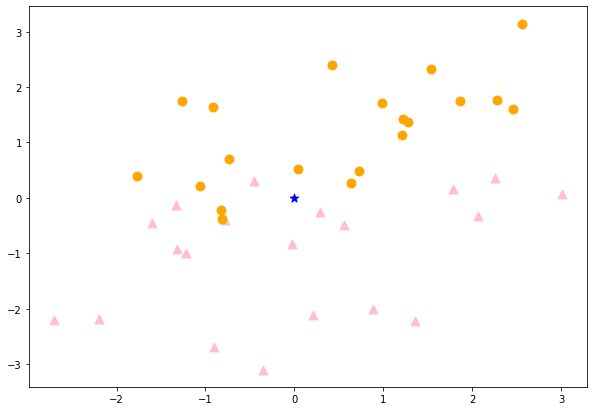

In [11]:
plt.figure(figsize=(10, 7))  # 그래프 사이즈 설정
plt.scatter(feature_1[:, 0], feature_1[:, 1], 80, color='pink', marker='^')  # feature_1에 해당하는 데이터 시각화
plt.scatter(feature_2[:, 0], feature_2[:, 1], 80, 'orange', 'o')   # feature_2에 해당하는 데이터 시각화
plt.scatter(new_data[:,0], new_data[:, 1], 80, 'b', '*')
plt.show()


In [12]:
prediction = knn.predict(new_data)          # 모델 예측

distance, indexes = knn.kneighbors(new_data)
print(distance)  # 선택한 이웃 5개의 거리

[[0.38050457 0.5236284  0.54484764 0.68703221 0.74197828]]


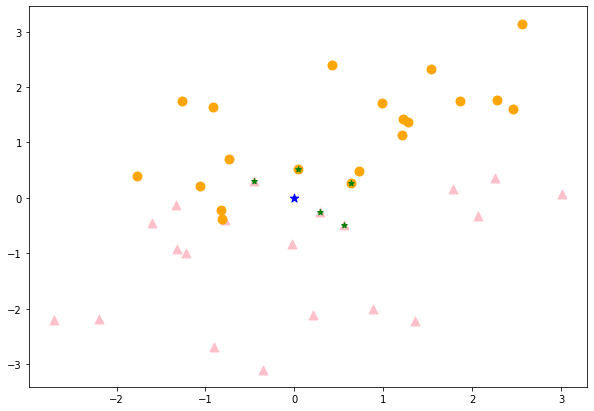

class : [0]


In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(feature_1[:, 0], feature_1[:, 1], 80, color='pink', marker='^')  # feature_1에 해당하는 데이터 시각화
plt.scatter(feature_2[:, 0], feature_2[:, 1], 80, 'orange', 'o')   # feature_2에 해당하는 데이터 시각화
plt.scatter(new_data[:, 0], new_data[:, 1], 80, 'b', '*')

plt.scatter(X[indexes, 0], X[indexes, 1], marker='*', color='g')  # 선택한 이웃 보여줌

plt.show()

print("class :" , prediction)


###  KNN 분류 모델 실습

- 주어진 과제 : iris 붓꽃 데이터를 가지고 종류 분류하기
- 어떻게 분류할 수 있을까? 
> 붓꽃 종류별로 **특징**을 알면 된다~

In [14]:
from IPython.display import Image

In [15]:
Image(url='https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png')

### 라이브러리 불러오기 

In [16]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt  
import seaborn as sns


### 1. 데이터 로드하기

In [17]:
# iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

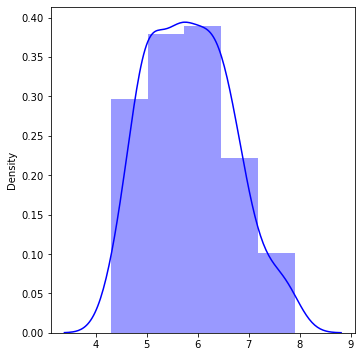

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')

# 정규화된 데이터이기 때문에 표준화 작업 pass  

### 2. 데이터 탐색하기 

### 데이터 전처리
- 분류모델은 지도학습으로 **정답**이 반드시 필요함
- 학습을 위한 데이터 준비


#### Feature Data 

In [18]:
print(iris.keys())


# sepal: 꽃받침, petal: 꽃잎
features = iris['data']
print(features[:5])
feature_names = iris['feature_names']
print(feature_names)



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Label data
- 지도학습은 **정답**이 반드시 필요함!

In [19]:
# 정답데이터(y) 확인하기
labels = iris['target']
print(iris['target_names'])
print(labels)


['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 데이터셋을 DataFrame으로 변환
- pandas 사용 

In [20]:
type(features)   # 현재 numpy 

numpy.ndarray

In [21]:
df = pd.DataFrame(features, columns=feature_names)  
df.head()   # 상위 5개의 데이터값 반환

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df['target'] = labels  # column 추가(이름은 임의로 지정 가능)
df.tail()  # 하위 5개의 데이터값 반환 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### DataFrame 시각화
- matplotlib : 데이터 시각화 패키
- seaborn : Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

In [23]:
# seaborn 팔레트 종류 
Image(url='https://hleecaster.com/wp-content/uploads/2019/12/article2_image6.png')  # 기본 팔레트 6가지 
Image(url='https://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png')


c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


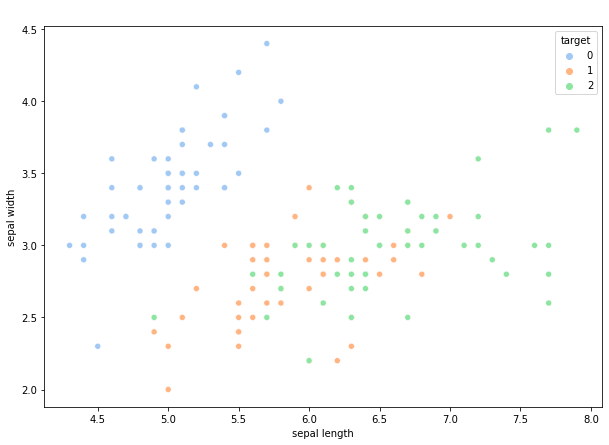

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


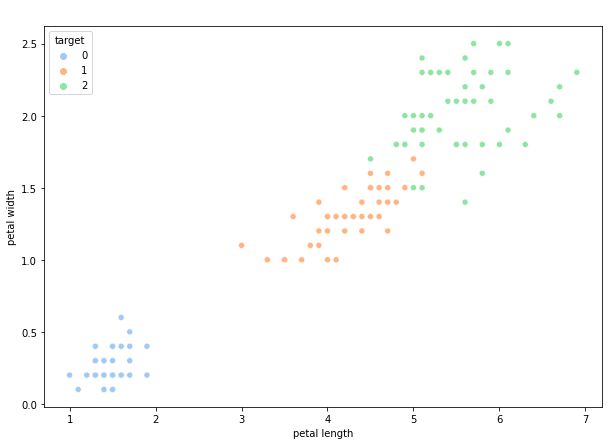

In [59]:
plt.figure(figsize=(10, 7))  # 그래프 사이즈 설정 
# iloc 사용하여 sepal length (cm), sepal width (cm) 값만 출력
sns.scatterplot(features[:, 0], features[:, 1],hue=df['target'], palette='pastel')

plt.xlabel("sepal length")  # x축
plt.ylabel("sepal width")   # y축
plt.title('Sepal', fontsize=17, color='w')   # 그래프 제목
plt.show()


plt.figure(figsize=(10, 7))  # 그래프 사이즈 설정

# iloc 사용하여 sepal length (cm), sepal width (cm) 값만 출력
sns.scatterplot(features[:, 2], features[:, 3],
                hue=df['target'], palette='pastel')

plt.xlabel("petal length")  # x축
plt.ylabel("petal width")   # y축
plt.title('Petal', fontsize=17, color='w')   # 그래프 제목
plt.show()



### 데이터 전처리 
- train(학습) / test(검증) 데이터 분리하기
 => 일반화된 모델을 만드는 것이 주목적이므로 학습(train)/검증(test) 데이터 분리가 중요함
- 1. 학습데이터, 검증데이터 각각 특징(x)과 정답(y)으로 나눠지는 데이터를 만들기
- 2. Scikit-learn의 train_test_split 이용하여 Train/Test 데이터 분리하기
- 3. 데이터 분리 방법은 여러가지(7:3 or 8:2) => 클래스별로 분리해야함


In [26]:
from sklearn.model_selection import train_test_split


In [64]:
print(df.iloc[:, 0])    # sepal length (cm) 열의 값 설정 => iloc 함수 
# features[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


In [27]:
x = df.iloc[:, :4]  # 특징데이터 : x
print(x.head())

y = df['target']   # 정답데이터 : y - 지도학습은 '정답데이터'가 반드시 필요함 
print(y.head())    


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#
# test_size: validation set에 할당할 비율 (20 %), 기본값 0.25
# stratify: 분할된 샘플의 class 개수를 동일한 비율로 유지
# random_state: 랜덤 시드값
# shuffle: 셔플 옵션, 기본값 True


### 전체 데이터 시각화 


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

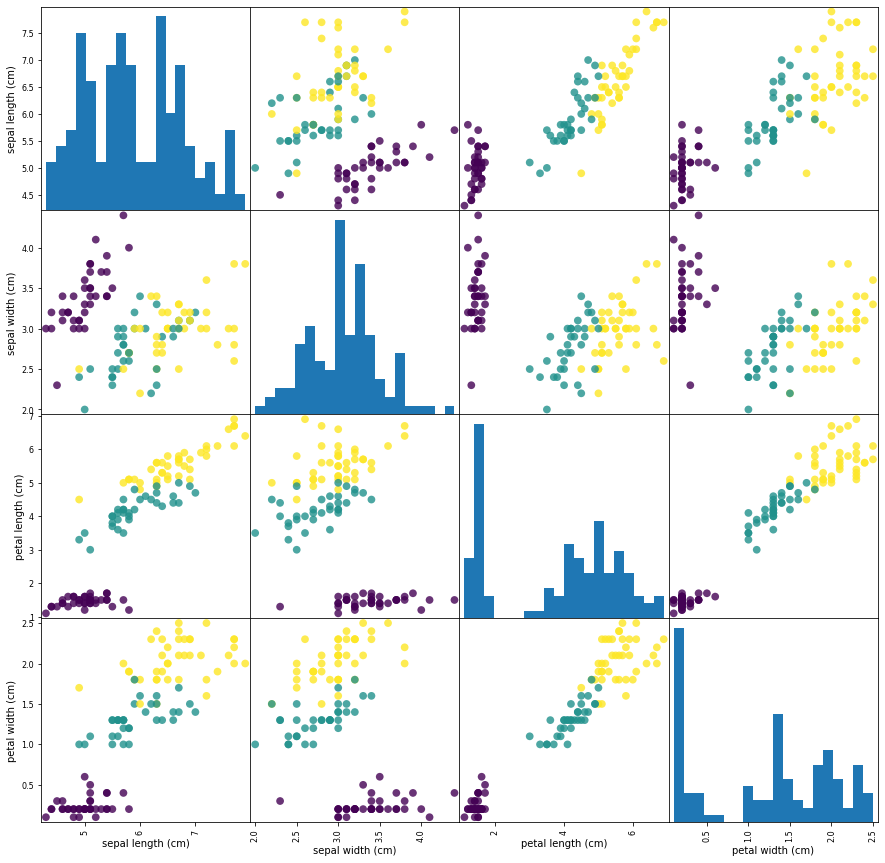

In [29]:
iris_df = pd.DataFrame(x_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [30]:
print(x.shape)  # 150개의 데이터 중에 
print(x_train.shape)  # 80%인 120개를 학습에 사용
print(x_test.shape)   # 20%인 30개를 검증에 사용 

(150, 4)
(112, 4)
(38, 4)


### KNN 분류 모델 생성
- K-최근접 이웃 분류 알고리즘
- 가장 단순하고 쉬운 알고리즘 => 가장 가까운 이웃찾아서 분류
- 거의 사용하지 않는다 

In [31]:
from sklearn.neighbors import KNeighborsClassifier


In [32]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [33]:
# 모델학습
knn.fit(x_train, y_train)


KNeighborsClassifier(n_jobs=-1)

In [34]:
# 검증(evaluation)
knn.score(x_test, y_test)

0.9736842105263158

In [35]:
# 꽃받침 길이가 4.8cm, 폭이 3.7cm, 꽃잎의 길이가 5.1cm, 폭이 0.4cm인 붓꽃은 어떤 품종일지 예측하기

new_data = np.array([[4.8, 3.7, 5.1, 0.4]]) # numpy 배열(샘플 수에 특성 수를 곱한 크기로 만들기)
print(new_data.shape)


(1, 4)


In [36]:
pred = knn.predict(new_data)
print(pred)

print("품종 이름 : " , iris['target_names'][pred])

[1]
품종 이름 :  ['versicolor']


In [37]:
y_pred = knn.predict(x_test)

print(x_test.shape)   # 30개를 검증에 사용
print(y_pred)           # 분류한 결과 


(38, 4)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


### 데이터 정규화
- 다른 통계 데이터들을 비교하기 용이하기 때문에 데이터 전처리 과정에서 필요함 
- 표준화 => 평균을 0, 분산 (표준편차)를 1로 만들어줌 

In [67]:
from sklearn.preprocessing import StandardScaler

# StandardScaler의 활용


In [65]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [66]:
round(x_scaled.mean(), 2), x_scaled.std()


(-0.0, 1.0)

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


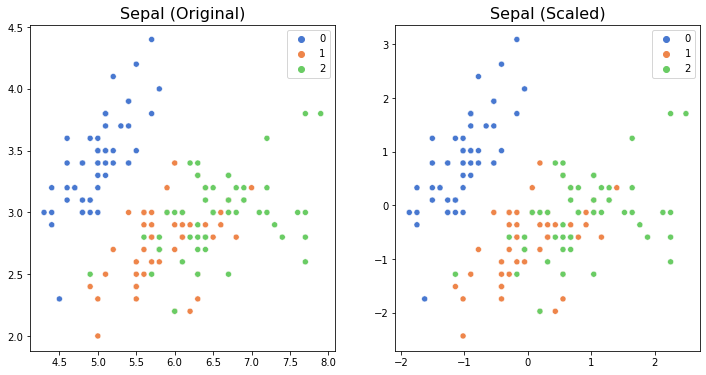

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 0], x[:, 1], hue=y, palette='muted')
plt.title('Sepal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:, 1], hue=y, palette='muted')
plt.title('Sepal (Scaled)', fontsize=16)
plt.show()



In [68]:
# MinMaxScaler의 활용

from sklearn.preprocessing import MinMaxScaler


In [69]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [70]:
x_scaled.min(), x_scaled.max()


(0.0, 1.0)

### 전, 후 비교(시각화)
- x축 범위가 0~1

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


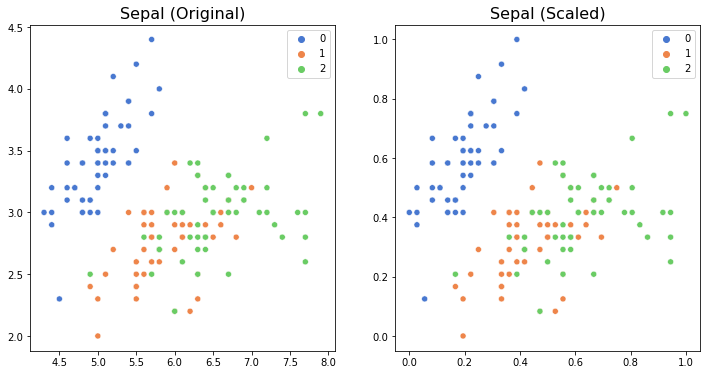

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 0], x[:, 1], hue=y, palette='muted')
plt.title('Sepal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:, 1], hue=y, palette='muted')
plt.title('Sepal (Scaled)', fontsize=16)
plt.show()
